Хеш-функций: 10, Оценка: 0.0000, Истинное: 0.0230, Ошибка: 0.0230
Хеш-функций: 50, Оценка: 0.0000, Истинное: 0.0230, Ошибка: 0.0230
Хеш-функций: 100, Оценка: 0.0000, Истинное: 0.0230, Ошибка: 0.0230
Хеш-функций: 200, Оценка: 0.0000, Истинное: 0.0230, Ошибка: 0.0230
Хеш-функций: 500, Оценка: 0.0000, Истинное: 0.0230, Ошибка: 0.0230


Text(0, 0.5, 'Частота')

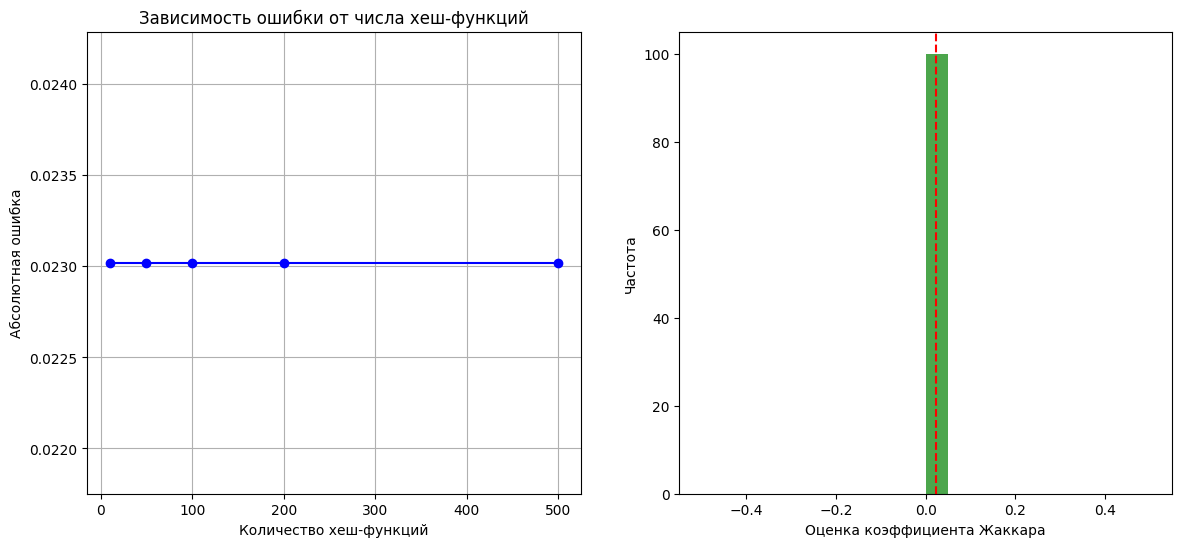

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random

class MinHash:
    def __init__(self, num_hashes):
        self.num_hashes = num_hashes
        self.a_params = [random.randint(1, 2**32) for _ in range(num_hashes)]
        self.b_params = [random.randint(1, 2**32) for _ in range(num_hashes)]
        self.min_values = np.full(num_hashes, np.inf)
    
    def _hash(self, item, a, b):
        item_hash = hash(str(item)) & 0xFFFFFFFF  
        return (a * item_hash + b) & 0xFFFFFFFF  
    
    def update(self, item):
        for i in range(self.num_hashes):
            h = self._hash(item, self.a_params[i], self.b_params[i])
            if h < self.min_values[i]:
                self.min_values[i] = h
    
    def jaccard(self, other):
        return np.mean(self.min_values == other.min_values)

random.seed(42)
data1 = set(random.sample(range(1, 10001), 1000)) 
data2 = set(random.sample(range(5000, 15001), 1000))

intersection = len(data1 & data2)
union = len(data1 | data2)
true_jaccard = intersection / union


num_hashes_list = [10, 50, 100, 200, 500]  

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
errors = []
for num_hashes in num_hashes_list:

    mh1 = MinHash(num_hashes)
    mh2 = MinHash(num_hashes)
    
    for item in data1:
        mh1.update(item)
    for item in data2:
        mh2.update(item)
    
    estimated_jaccard = mh1.jaccard(mh2)
    error = abs(estimated_jaccard - true_jaccard)
    errors.append(error)
    print(f"Хеш-функций: {num_hashes}, Оценка: {estimated_jaccard:.4f}, Истинное: {true_jaccard:.4f}, Ошибка: {error:.4f}")

plt.plot(num_hashes_list, errors, marker='o', color='blue')
plt.xlabel('Количество хеш-функций')
plt.ylabel('Абсолютная ошибка')
plt.title('Зависимость ошибки от числа хеш-функций')
plt.grid(True)

plt.subplot(1, 2, 2)
num_trials = 100
num_hashes = 100
estimates = []

for _ in range(num_trials):
    mh1 = MinHash(num_hashes)
    mh2 = MinHash(num_hashes)
    
    for item in data1:
        mh1.update(item)
    for item in data2:
        mh2.update(item)
    
    estimates.append(mh1.jaccard(mh2))

plt.hist(estimates, bins=20, alpha=0.7, color='green')
plt.axvline(true_jaccard, color='red', linestyle='--', label=f'Истинный коэффициент: {true_jaccard:.4f}')
plt.xlabel('Оценка коэффициента Жаккара')
plt.ylabel('Частота')

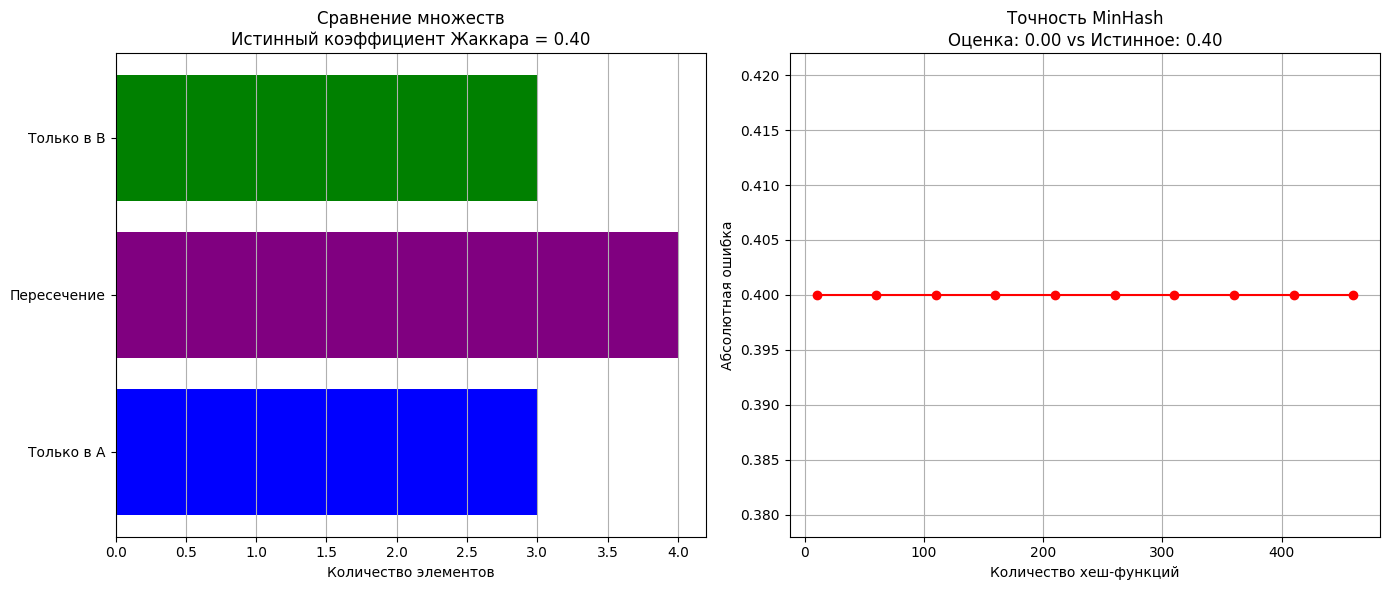

Элементы только в A: {'груша', 'ананас', 'яблоко'}
Элементы только в B: {'арбуз', 'персик', 'виноград'}
Общие элементы: {'манго', 'апельсин', 'банан', 'киви'}
Истинный коэффициент Жаккара: 0.4000
Оценка MinHash: 0.0000
Абсолютная ошибка: 0.4000


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

set_A = {'яблоко', 'банан', 'апельсин', 'груша', 'киви', 'манго', 'ананас'}
set_B = {'банан', 'апельсин', 'виноград', 'арбуз', 'киви', 'персик', 'манго'}

intersection = set_A & set_B
only_A = set_A - set_B
only_B = set_B - set_A
true_jaccard = len(intersection) / len(set_A | set_B)

mh_A = MinHash(100)
mh_B = MinHash(100)

for item in set_A:
    mh_A.update(item)
for item in set_B:
    mh_B.update(item)

estimated_jaccard = mh_A.jaccard(mh_B)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(['Только в A', 'Пересечение', 'Только в B'], 
        [len(only_A), len(intersection), len(only_B)],
        color=['blue', 'purple', 'green'])
plt.title(f"Сравнение множеств\nИстинный коэффициент Жаккара = {true_jaccard:.2f}")
plt.xlabel("Количество элементов")
plt.grid(axis='x')

plt.subplot(1, 2, 2)
num_hashes_range = range(10, 501, 50)
errors = []

for num_hashes in num_hashes_range:
    mh1 = MinHash(num_hashes)
    mh2 = MinHash(num_hashes)
    
    for item in set_A:
        mh1.update(item)
    for item in set_B:
        mh2.update(item)
    
    errors.append(abs(mh1.jaccard(mh2) - true_jaccard))

plt.plot(num_hashes_range, errors, marker='o', color='red')
plt.xlabel('Количество хеш-функций')
plt.ylabel('Абсолютная ошибка')
plt.title(f'Точность MinHash\nОценка: {estimated_jaccard:.2f} vs Истинное: {true_jaccard:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Элементы только в A:", only_A)
print("Элементы только в B:", only_B)
print("Общие элементы:", intersection)
print(f"Истинный коэффициент Жаккара: {true_jaccard:.4f}")
print(f"Оценка MinHash: {estimated_jaccard:.4f}")
print(f"Абсолютная ошибка: {abs(estimated_jaccard - true_jaccard):.4f}")